In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import time

In [28]:
data = pd.read_csv("Mall_Customers.csv")

print("First 5 rows of the dataset:")
display(data.head())

First 5 rows of the dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Selecting relevant features
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Summary statistics
print("\nSummary Statistics:")
display(X.describe())

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Summary Statistics:


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<Figure size 1200x500 with 0 Axes>

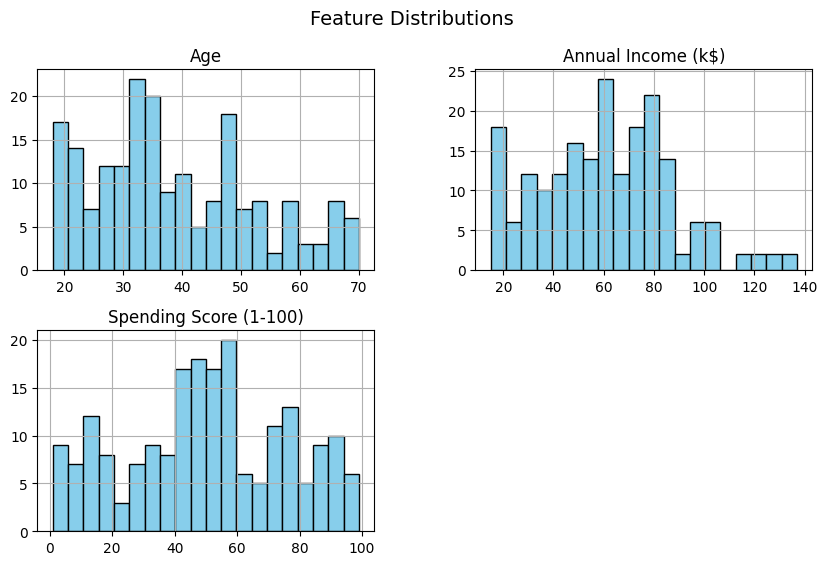

In [30]:
# Visualization: Feature Distributions
plt.figure(figsize=(12,5))
X.hist(figsize=(10,6), bins=20, edgecolor='black', color='skyblue')
plt.suptitle('Feature Distributions', fontsize=14)
plt.show()

C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` va

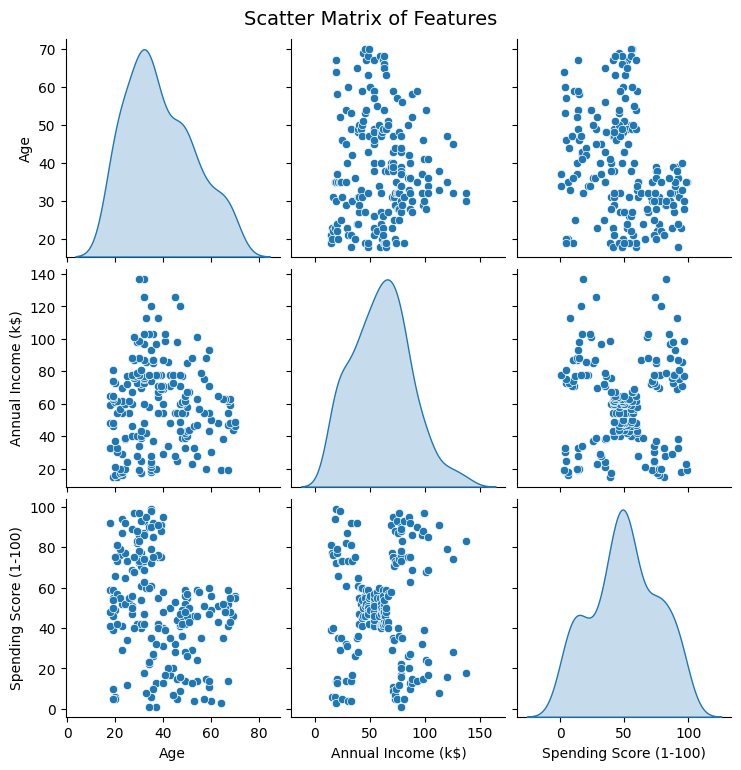

In [31]:
# Visualization: Scatter Matrix
sns.pairplot(X, diag_kind='kde', palette='Set2')
plt.suptitle("Scatter Matrix of Features", y=1.02, fontsize=14)
plt.show()

In [32]:
# Standardizing the data (important for equal weightage)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nFeatures standardized for K-Means clustering.")


Features standardized for K-Means clustering.


In [ ]:
# Random Initialization
def initialize_centroids(X, k, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

In [33]:
# K-Means++ Initialization -- that means new centers are more likely to be placed where clusters are far apart, leading to balanced cluster initialization.
def initialize_centroids_kmeanspp(X, k, random_state=None):
    if random_state:
        np.random.seed(random_state)
    centroids = []
    centroids.append(X[np.random.randint(0, X.shape[0])])
    for _ in range(1, k):
        distances = np.array([min([np.inner(x-c, x-c) for c in centroids]) for x in X])
        probs = distances / distances.sum()
        cumulative_probs = np.cumsum(probs)
        r = np.random.rand()
        for j, p in enumerate(cumulative_probs):
            if r < p:
                centroids.append(X[j])
                break
    return np.array(centroids)

In [34]:
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])


In [35]:
def kmeans(X, k, max_iters=100, tol=1e-4, random_state=None, init='kmeans++'):
    if init == 'kmeans++':
        centroids = initialize_centroids_kmeanspp(X, k, random_state)
    else:
        centroids = initialize_centroids(X, k, random_state)
    
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
        
    inertia = np.sum(np.min(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)**2, axis=1))
    return centroids, labels, i+1, inertia


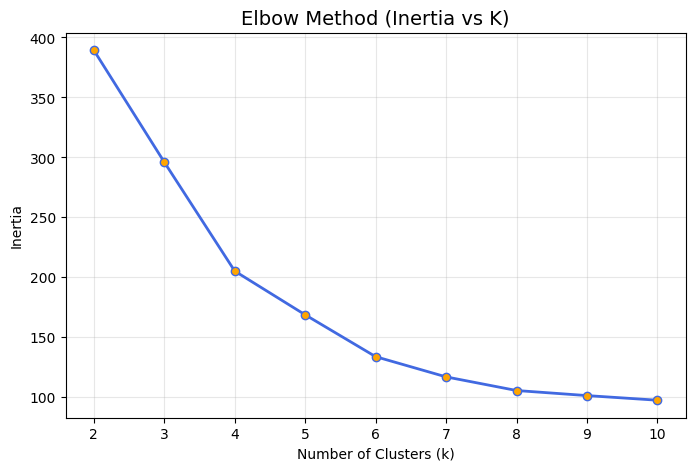

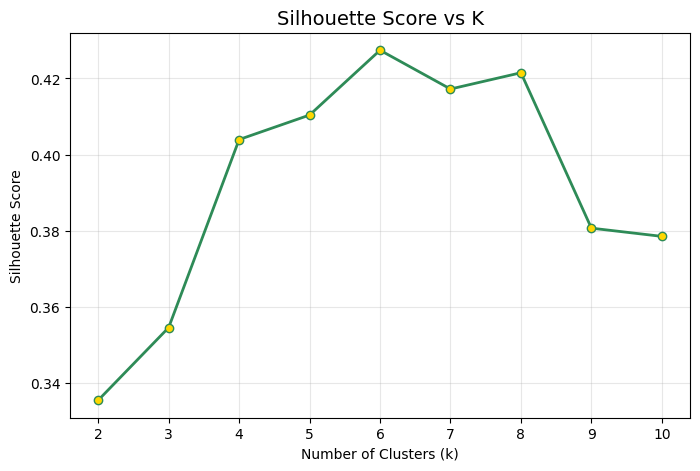


Select k based on Elbow bend and highest Silhouette Score.


In [36]:
inertias = []
sil_scores = []
K = range(2, 11)

for k in K:
    centroids, labels, iters, inertia = kmeans(X_scaled, k, random_state=42, init='kmeans++')
    inertias.append(inertia)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Elbow Method
plt.figure(figsize=(8,5))
plt.plot(K, inertias, 'o-', color='royalblue', linewidth=2, markerfacecolor='orange')
plt.title('Elbow Method (Inertia vs K)', fontsize=14)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(alpha=0.3)
plt.show()

# Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(K, sil_scores, 'o-', color='seagreen', linewidth=2, markerfacecolor='gold')
plt.title('Silhouette Score vs K', fontsize=14)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(alpha=0.3)
plt.show()

print("\nSelect k based on Elbow bend and highest Silhouette Score.")


In [39]:
# Assume optimal k from graph is 6
k = 6

start = time.time()
centroids_scaled, labels, iters, inertia = kmeans(X_scaled, k, random_state=42, init='kmeans++')
end = time.time()

centroids = scaler.inverse_transform(centroids_scaled)

print(f"Iterations: {iters}")
print(f"Inertia: {inertia:.2f}")
print(f"Runtime: {round(end - start, 3)} seconds\n")

# Cluster Summary
df_clustered = pd.DataFrame(X, columns=['Age','Annual Income (k$)','Spending Score (1-100)'])
df_clustered['Cluster'] = labels
summary = df_clustered.groupby('Cluster').mean()
print("Cluster Summary (Average of each feature):")
display(summary)


Iterations: 10
Inertia: 133.87
Runtime: 0.029 seconds

Cluster Summary (Average of each feature):


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.333333,54.266667,49.066667
1,32.692308,86.538462,82.128205
2,25.250000,25.833333,76.916667
3,41.939394,88.939394,16.969697
4,26.684211,57.578947,47.789474
5,45.523810,26.285714,19.380952


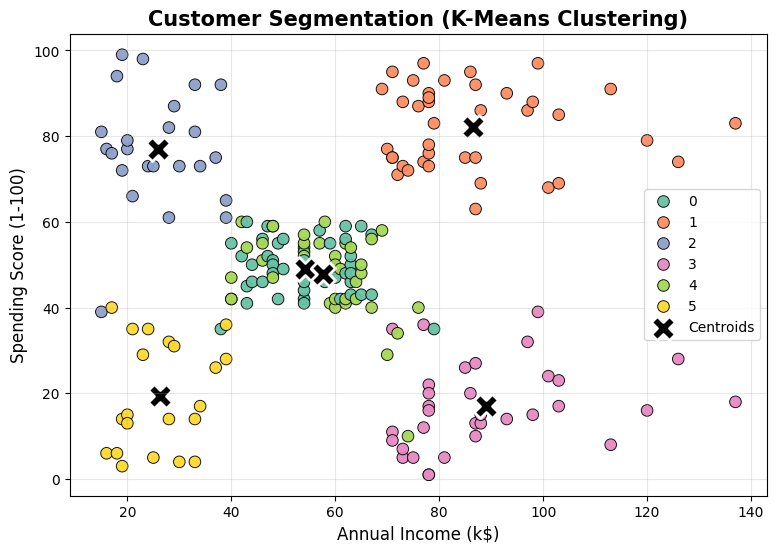

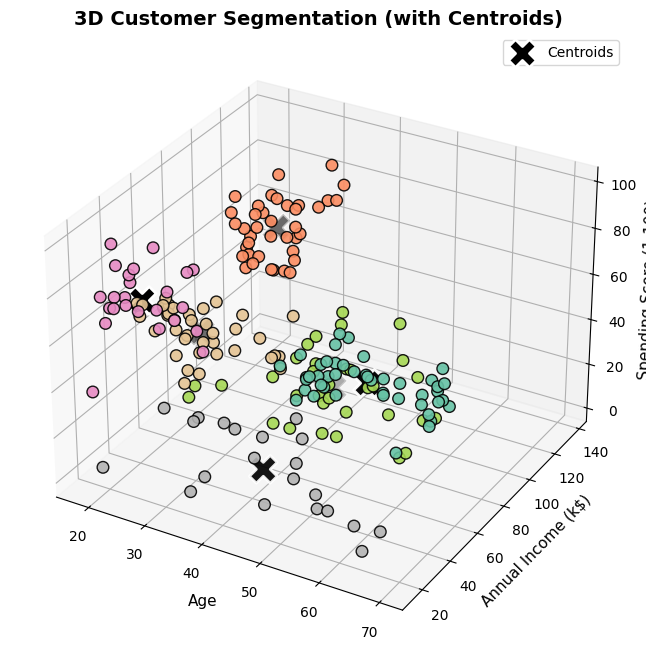

In [43]:

# Visualization of Clusters (2D & 3D)

# Ensure X is a NumPy array (convert if it’s a DataFrame)
if not isinstance(X, np.ndarray):
    X = X.values

# 2D CLUSTER PLOT (Annual Income vs Spending Score)
plt.figure(figsize=(9,6))
palette = sns.color_palette("Set2", n_colors=k)
sns.scatterplot(
    x=X[:, 1], y=X[:, 2], hue=labels, palette=palette, s=70, alpha=0.95, edgecolor='black'
)
plt.scatter(centroids[:, 1], centroids[:, 2], s=300, c='black', marker='X', label='Centroids', edgecolors='white', linewidths=2)
plt.title('Customer Segmentation (K-Means Clustering)', fontsize=15, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# 3D SCATTER PLOT (Age, Income, Spending Score)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
sc = ax.scatter(
    X[:, 0], X[:, 1], X[:, 2],
    c=labels, cmap='Set2', s=70, alpha=0.9, edgecolor='black'
)

# Plot centroids
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    s=400, c='black', marker='X', edgecolors='white', linewidths=2, label='Centroids'
)

ax.set_xlabel('Age', fontsize=11)
ax.set_ylabel('Annual Income (k$)', fontsize=11)
ax.set_zlabel('Spending Score (1-100)', fontsize=11)
ax.set_title('3D Customer Segmentation (with Centroids)', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
plt.show()


In [44]:
start = time.time()
kmeans_sklearn = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init=10)
kmeans_sklearn.fit(X_scaled)
end = time.time()

print("scikit-learn Results:")
print("Iterations:", kmeans_sklearn.n_iter_)
print("Inertia:", kmeans_sklearn.inertia_)
print("Runtime:", round(end - start, 3), "seconds")
print("\nCentroids (Original Scale):")
display(pd.DataFrame(scaler.inverse_transform(kmeans_sklearn.cluster_centers_), columns=['Age','Annual Income (k$)','Spending Score (1-100)']))


scikit-learn Results:
Iterations: 6
Inertia: 133.86842085478855
Runtime: 0.22 seconds

Centroids (Original Scale):


,Age,Annual Income (k$),Spending Score (1-100)
0,56.333333,54.266667,49.066667
1,26.794872,57.102564,48.128205
2,41.939394,88.939394,16.969697
3,32.692308,86.538462,82.128205
4,25.000000,25.260870,77.608696
5,45.523810,26.285714,19.380952
